In [1]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

import pylab
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
num_ch_c1 = 64  # Question 2
num_ch_c2 = 64  # Question 2

epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

# Fixed, no need change
def load_data(file):
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    labels = np.array(labels, dtype=np.int32)
    return data, labels

# Training and test
x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

In [16]:
model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 3, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(num_ch_c2, 2, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(10, use_bias=True, input_shape=(300,)))

In [17]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.SGD(learning_rate=learning_rate, decay =1e-6)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 1s 8ms/step - loss: 2.3489 - accuracy: 0.0969 - val_loss: 2.3016 - val_accuracy: 0.0825
Epoch 2/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.3259 - accuracy: 0.1038 - val_loss: 2.2972 - val_accuracy: 0.1190
Epoch 3/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.3158 - accuracy: 0.1042 - val_loss: 2.2946 - val_accuracy: 0.1265
Epoch 4/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.3147 - accuracy: 0.1073 - val_loss: 2.2925 - val_accuracy: 0.1280
Epoch 5/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.3093 - accuracy: 0.1109 - val_loss: 2.2906 - val_accuracy: 0.1325
Epoch 6/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.3034 - accuracy: 0.1119 - val_loss: 2.2888 - val_accuracy: 0.1325
Epoch 7/1000
79/79 [==============================] - 0s 5ms/step - loss: 2.2972 - accuracy: 0.1121 - val_loss: 2.2869 - val_accuracy: 0.1370
Epoch 

79/79 [==============================] - 0s 5ms/step - loss: 1.8668 - accuracy: 0.3384 - val_loss: 1.8431 - val_accuracy: 0.3630
Epoch 116/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8626 - accuracy: 0.3371 - val_loss: 1.8326 - val_accuracy: 0.3690
Epoch 117/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8636 - accuracy: 0.3360 - val_loss: 1.8368 - val_accuracy: 0.3590
Epoch 118/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8611 - accuracy: 0.3369 - val_loss: 1.8320 - val_accuracy: 0.3660
Epoch 119/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8603 - accuracy: 0.3359 - val_loss: 1.8255 - val_accuracy: 0.3730
Epoch 120/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8523 - accuracy: 0.3384 - val_loss: 1.8286 - val_accuracy: 0.3645
Epoch 121/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.8527 - accuracy: 0.3409 - val_loss: 1.8196 - val_accuracy: 0.3780
Epoch 1

Epoch 172/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7386 - accuracy: 0.3792 - val_loss: 1.6968 - val_accuracy: 0.4055
Epoch 173/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7364 - accuracy: 0.3804 - val_loss: 1.6953 - val_accuracy: 0.4090
Epoch 174/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7359 - accuracy: 0.3786 - val_loss: 1.6924 - val_accuracy: 0.4130
Epoch 175/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7321 - accuracy: 0.3802 - val_loss: 1.6921 - val_accuracy: 0.4075
Epoch 176/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7272 - accuracy: 0.3858 - val_loss: 1.6878 - val_accuracy: 0.4200
Epoch 177/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7257 - accuracy: 0.3857 - val_loss: 1.6889 - val_accuracy: 0.4070
Epoch 178/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.7296 - accuracy: 0.3828 - val_loss: 1.6842 - val_accuracy:

Epoch 229/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6456 - accuracy: 0.4157 - val_loss: 1.6044 - val_accuracy: 0.4455
Epoch 230/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6368 - accuracy: 0.4151 - val_loss: 1.5952 - val_accuracy: 0.4445
Epoch 231/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6356 - accuracy: 0.4186 - val_loss: 1.5923 - val_accuracy: 0.4475
Epoch 232/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6373 - accuracy: 0.4199 - val_loss: 1.5929 - val_accuracy: 0.4380
Epoch 233/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6355 - accuracy: 0.4162 - val_loss: 1.5933 - val_accuracy: 0.4440
Epoch 234/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6263 - accuracy: 0.4201 - val_loss: 1.5926 - val_accuracy: 0.4435
Epoch 235/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.6325 - accuracy: 0.4176 - val_loss: 1.5885 - val_accuracy:

Epoch 286/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5754 - accuracy: 0.4422 - val_loss: 1.5309 - val_accuracy: 0.4680
Epoch 287/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5739 - accuracy: 0.4410 - val_loss: 1.5306 - val_accuracy: 0.4640
Epoch 288/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5678 - accuracy: 0.4374 - val_loss: 1.5380 - val_accuracy: 0.4605
Epoch 289/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5637 - accuracy: 0.4424 - val_loss: 1.5298 - val_accuracy: 0.4670
Epoch 290/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5720 - accuracy: 0.4359 - val_loss: 1.5332 - val_accuracy: 0.4645
Epoch 291/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5724 - accuracy: 0.4451 - val_loss: 1.5434 - val_accuracy: 0.4570
Epoch 292/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5671 - accuracy: 0.4416 - val_loss: 1.5265 - val_accuracy:

Epoch 343/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5290 - accuracy: 0.4568 - val_loss: 1.5019 - val_accuracy: 0.4880
Epoch 344/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5232 - accuracy: 0.4611 - val_loss: 1.4964 - val_accuracy: 0.4780
Epoch 345/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5263 - accuracy: 0.4592 - val_loss: 1.4901 - val_accuracy: 0.4790
Epoch 346/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5317 - accuracy: 0.4560 - val_loss: 1.4991 - val_accuracy: 0.4895
Epoch 347/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.5292 - accuracy: 0.4506 - val_loss: 1.4895 - val_accuracy: 0.4825
Epoch 348/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5311 - accuracy: 0.4559 - val_loss: 1.4880 - val_accuracy: 0.4815
Epoch 349/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.5266 - accuracy: 0.4540 - val_loss: 1.5017 - val_accuracy:

Epoch 400/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4984 - accuracy: 0.4657 - val_loss: 1.4594 - val_accuracy: 0.4985
Epoch 401/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4969 - accuracy: 0.4703 - val_loss: 1.4586 - val_accuracy: 0.4940
Epoch 402/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4932 - accuracy: 0.4699 - val_loss: 1.4579 - val_accuracy: 0.4960
Epoch 403/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4972 - accuracy: 0.4653 - val_loss: 1.4591 - val_accuracy: 0.5000
Epoch 404/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4929 - accuracy: 0.4696 - val_loss: 1.4623 - val_accuracy: 0.5030
Epoch 405/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4932 - accuracy: 0.4689 - val_loss: 1.4570 - val_accuracy: 0.4960
Epoch 406/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4920 - accuracy: 0.4740 - val_loss: 1.4563 - val_accuracy:

Epoch 457/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4636 - accuracy: 0.4803 - val_loss: 1.4325 - val_accuracy: 0.5095
Epoch 458/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4610 - accuracy: 0.4839 - val_loss: 1.4312 - val_accuracy: 0.5095
Epoch 459/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4668 - accuracy: 0.4819 - val_loss: 1.4310 - val_accuracy: 0.5115
Epoch 460/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4624 - accuracy: 0.4861 - val_loss: 1.4289 - val_accuracy: 0.5120
Epoch 461/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4581 - accuracy: 0.4868 - val_loss: 1.4277 - val_accuracy: 0.5105
Epoch 462/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4643 - accuracy: 0.4806 - val_loss: 1.4423 - val_accuracy: 0.5040
Epoch 463/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4578 - accuracy: 0.4840 - val_loss: 1.4274 - val_accuracy:

Epoch 514/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4372 - accuracy: 0.4903 - val_loss: 1.4038 - val_accuracy: 0.5195
Epoch 515/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4303 - accuracy: 0.4963 - val_loss: 1.4027 - val_accuracy: 0.5205
Epoch 516/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4331 - accuracy: 0.4950 - val_loss: 1.4029 - val_accuracy: 0.5205
Epoch 517/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4362 - accuracy: 0.4940 - val_loss: 1.4068 - val_accuracy: 0.5165
Epoch 518/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4380 - accuracy: 0.4899 - val_loss: 1.4017 - val_accuracy: 0.5190
Epoch 519/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4297 - accuracy: 0.4923 - val_loss: 1.4059 - val_accuracy: 0.5230
Epoch 520/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4370 - accuracy: 0.4919 - val_loss: 1.4092 - val_accuracy:

Epoch 571/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4136 - accuracy: 0.4995 - val_loss: 1.3796 - val_accuracy: 0.5270
Epoch 572/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3986 - accuracy: 0.5056 - val_loss: 1.3826 - val_accuracy: 0.5225
Epoch 573/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4090 - accuracy: 0.4987 - val_loss: 1.3795 - val_accuracy: 0.5340
Epoch 574/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4033 - accuracy: 0.5010 - val_loss: 1.3810 - val_accuracy: 0.5330
Epoch 575/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.4089 - accuracy: 0.5002 - val_loss: 1.3771 - val_accuracy: 0.5315
Epoch 576/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4095 - accuracy: 0.4953 - val_loss: 1.3816 - val_accuracy: 0.5345
Epoch 577/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.4126 - accuracy: 0.5006 - val_loss: 1.3766 - val_accuracy:

Epoch 628/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3860 - accuracy: 0.5141 - val_loss: 1.3569 - val_accuracy: 0.5380
Epoch 629/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3853 - accuracy: 0.5158 - val_loss: 1.3576 - val_accuracy: 0.5355
Epoch 630/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3808 - accuracy: 0.5091 - val_loss: 1.3557 - val_accuracy: 0.5365
Epoch 631/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3791 - accuracy: 0.5123 - val_loss: 1.3557 - val_accuracy: 0.5370
Epoch 632/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3781 - accuracy: 0.5121 - val_loss: 1.3578 - val_accuracy: 0.5325
Epoch 633/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3789 - accuracy: 0.5107 - val_loss: 1.3543 - val_accuracy: 0.5430
Epoch 634/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3826 - accuracy: 0.5147 - val_loss: 1.3592 - val_accuracy:

Epoch 685/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3570 - accuracy: 0.5203 - val_loss: 1.3391 - val_accuracy: 0.5390
Epoch 686/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3540 - accuracy: 0.5229 - val_loss: 1.3353 - val_accuracy: 0.5450
Epoch 687/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3559 - accuracy: 0.5164 - val_loss: 1.3376 - val_accuracy: 0.5400
Epoch 688/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3560 - accuracy: 0.5217 - val_loss: 1.3381 - val_accuracy: 0.5420
Epoch 689/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3508 - accuracy: 0.5199 - val_loss: 1.3395 - val_accuracy: 0.5455
Epoch 690/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3556 - accuracy: 0.5186 - val_loss: 1.3323 - val_accuracy: 0.5465
Epoch 691/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3533 - accuracy: 0.5175 - val_loss: 1.3380 - val_accuracy:

Epoch 742/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3272 - accuracy: 0.5321 - val_loss: 1.3162 - val_accuracy: 0.5505
Epoch 743/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3284 - accuracy: 0.5313 - val_loss: 1.3231 - val_accuracy: 0.5475
Epoch 744/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3282 - accuracy: 0.5289 - val_loss: 1.3189 - val_accuracy: 0.5510
Epoch 745/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3277 - accuracy: 0.5310 - val_loss: 1.3241 - val_accuracy: 0.5435
Epoch 746/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3356 - accuracy: 0.5250 - val_loss: 1.3142 - val_accuracy: 0.5520
Epoch 747/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3263 - accuracy: 0.5366 - val_loss: 1.3148 - val_accuracy: 0.5545
Epoch 748/1000
79/79 [==============================] - 0s 6ms/step - loss: 1.3282 - accuracy: 0.5355 - val_loss: 1.3113 - val_accuracy:

Epoch 799/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3088 - accuracy: 0.5426 - val_loss: 1.2976 - val_accuracy: 0.5590
Epoch 800/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3066 - accuracy: 0.5438 - val_loss: 1.2981 - val_accuracy: 0.5555
Epoch 801/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3109 - accuracy: 0.5371 - val_loss: 1.2979 - val_accuracy: 0.5575
Epoch 802/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3092 - accuracy: 0.5393 - val_loss: 1.2987 - val_accuracy: 0.5600
Epoch 803/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2996 - accuracy: 0.5391 - val_loss: 1.3006 - val_accuracy: 0.5550
Epoch 804/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.3007 - accuracy: 0.5422 - val_loss: 1.2946 - val_accuracy: 0.5585
Epoch 805/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2990 - accuracy: 0.5422 - val_loss: 1.2968 - val_accuracy:

Epoch 856/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2870 - accuracy: 0.5467 - val_loss: 1.2852 - val_accuracy: 0.5585
Epoch 857/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2801 - accuracy: 0.5451 - val_loss: 1.2855 - val_accuracy: 0.5625
Epoch 858/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2846 - accuracy: 0.5482 - val_loss: 1.2815 - val_accuracy: 0.5650
Epoch 859/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2811 - accuracy: 0.5408 - val_loss: 1.2809 - val_accuracy: 0.5670
Epoch 860/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2777 - accuracy: 0.5491 - val_loss: 1.2863 - val_accuracy: 0.5640
Epoch 861/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2858 - accuracy: 0.5500 - val_loss: 1.2767 - val_accuracy: 0.5680
Epoch 862/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2809 - accuracy: 0.5501 - val_loss: 1.2797 - val_accuracy:

Epoch 913/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2660 - accuracy: 0.5553 - val_loss: 1.2660 - val_accuracy: 0.5765
Epoch 914/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2648 - accuracy: 0.5574 - val_loss: 1.2642 - val_accuracy: 0.5735
Epoch 915/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2642 - accuracy: 0.5526 - val_loss: 1.2709 - val_accuracy: 0.5660
Epoch 916/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2594 - accuracy: 0.5561 - val_loss: 1.2697 - val_accuracy: 0.5640
Epoch 917/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2646 - accuracy: 0.5540 - val_loss: 1.2736 - val_accuracy: 0.5650
Epoch 918/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2558 - accuracy: 0.5558 - val_loss: 1.2671 - val_accuracy: 0.5680
Epoch 919/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2631 - accuracy: 0.5579 - val_loss: 1.2637 - val_accuracy:

Epoch 970/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2486 - accuracy: 0.5606 - val_loss: 1.2645 - val_accuracy: 0.5705
Epoch 971/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2397 - accuracy: 0.5568 - val_loss: 1.2560 - val_accuracy: 0.5705
Epoch 972/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2412 - accuracy: 0.5639 - val_loss: 1.2555 - val_accuracy: 0.5735
Epoch 973/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2498 - accuracy: 0.5607 - val_loss: 1.2515 - val_accuracy: 0.5760
Epoch 974/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2439 - accuracy: 0.5653 - val_loss: 1.2571 - val_accuracy: 0.5730
Epoch 975/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2461 - accuracy: 0.5608 - val_loss: 1.2508 - val_accuracy: 0.5710
Epoch 976/1000
79/79 [==============================] - 0s 5ms/step - loss: 1.2484 - accuracy: 0.5638 - val_loss: 1.2588 - val_accuracy:

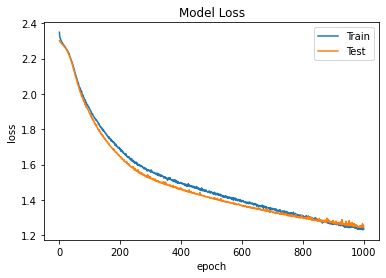

In [18]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

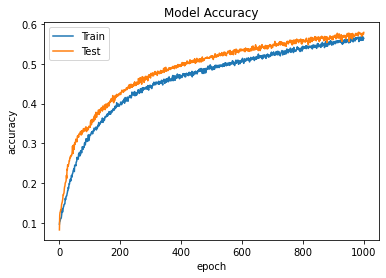

In [19]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

In [21]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)
epochs = 1000  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001

num_ch_c1 =90  
num_ch_c2 = 100

model = tf.keras.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Reshape(target_shape=(32, 32, 3), input_shape=(3072,)))
model.add(layers.Conv2D(num_ch_c1, 9, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Conv2D(num_ch_c2, 5, activation='relu', input_shape=(None, None, 3), padding="valid"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation = None))
model.add(layers.Dense(10, activation = 'softmax'))
          
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_9 (Reshape)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 90)        21960     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 90)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 100)         225100    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 100)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 300)              

In [22]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test))

Epoch 1/1000
79/79 [==============================] - 1s 9ms/step - loss: 2.2601 - accuracy: 0.1702 - val_loss: 2.2080 - val_accuracy: 0.2430
Epoch 2/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.2053 - accuracy: 0.2382 - val_loss: 2.2924 - val_accuracy: 0.1495
Epoch 3/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1765 - accuracy: 0.2736 - val_loss: 2.1984 - val_accuracy: 0.2500
Epoch 4/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1466 - accuracy: 0.3026 - val_loss: 2.1714 - val_accuracy: 0.2790
Epoch 5/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1346 - accuracy: 0.3188 - val_loss: 2.1599 - val_accuracy: 0.2880
Epoch 6/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1164 - accuracy: 0.3373 - val_loss: 2.2135 - val_accuracy: 0.2415
Epoch 7/1000
79/79 [==============================] - 1s 7ms/step - loss: 2.1172 - accuracy: 0.3371 - val_loss: 2.1116 - val_accuracy: 0.3440
Epoch 

79/79 [==============================] - 1s 7ms/step - loss: 1.9902 - accuracy: 0.4694 - val_loss: 2.0571 - val_accuracy: 0.4035
Epoch 59/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9785 - accuracy: 0.4818 - val_loss: 2.0785 - val_accuracy: 0.3815
Epoch 60/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9836 - accuracy: 0.4756 - val_loss: 2.0689 - val_accuracy: 0.3915
Epoch 61/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9815 - accuracy: 0.4785 - val_loss: 2.0148 - val_accuracy: 0.4445
Epoch 62/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9872 - accuracy: 0.4727 - val_loss: 2.0140 - val_accuracy: 0.4465
Epoch 63/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9772 - accuracy: 0.4818 - val_loss: 2.0293 - val_accuracy: 0.4315
Epoch 64/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9845 - accuracy: 0.4745 - val_loss: 2.0077 - val_accuracy: 0.4515
Epoch 65/1000

79/79 [==============================] - 1s 7ms/step - loss: 1.9763 - accuracy: 0.4846 - val_loss: 2.0297 - val_accuracy: 0.4315
Epoch 116/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9804 - accuracy: 0.4803 - val_loss: 2.0364 - val_accuracy: 0.4240
Epoch 117/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9894 - accuracy: 0.4710 - val_loss: 2.0830 - val_accuracy: 0.3775
Epoch 118/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9698 - accuracy: 0.4908 - val_loss: 2.0598 - val_accuracy: 0.4020
Epoch 119/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9864 - accuracy: 0.4742 - val_loss: 2.0245 - val_accuracy: 0.4350
Epoch 120/1000
79/79 [==============================] - 1s 8ms/step - loss: 1.9623 - accuracy: 0.4988 - val_loss: 2.0179 - val_accuracy: 0.4415
Epoch 121/1000
79/79 [==============================] - 1s 7ms/step - loss: 1.9597 - accuracy: 0.5011 - val_loss: 2.0202 - val_accuracy: 0.4410
Epoch 1

Epoch 172/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.9774 - accuracy: 0.4834 - val_loss: 2.0230 - val_accuracy: 0.4375
Epoch 173/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0300 - accuracy: 0.4309 - val_loss: 2.1000 - val_accuracy: 0.3605
Epoch 174/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0647 - accuracy: 0.3963 - val_loss: 2.0496 - val_accuracy: 0.4115
Epoch 175/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0043 - accuracy: 0.4564 - val_loss: 2.0519 - val_accuracy: 0.4090
Epoch 176/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0159 - accuracy: 0.4451 - val_loss: 2.0191 - val_accuracy: 0.4420
Epoch 177/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.9946 - accuracy: 0.4666 - val_loss: 1.9982 - val_accuracy: 0.4630
Epoch 178/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.9878 - accuracy: 0.4731 - val_loss: 2.0566 - val_ac

79/79 [==============================] - 1s 14ms/step - loss: 2.0632 - accuracy: 0.3978 - val_loss: 2.0832 - val_accuracy: 0.3780
Epoch 229/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0039 - accuracy: 0.4572 - val_loss: 2.0445 - val_accuracy: 0.4170
Epoch 230/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0220 - accuracy: 0.4388 - val_loss: 2.0332 - val_accuracy: 0.4280
Epoch 231/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0372 - accuracy: 0.4239 - val_loss: 2.0551 - val_accuracy: 0.4055
Epoch 232/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.9963 - accuracy: 0.4648 - val_loss: 2.0156 - val_accuracy: 0.4445
Epoch 233/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0095 - accuracy: 0.4513 - val_loss: 2.0454 - val_accuracy: 0.4155
Epoch 234/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0226 - accuracy: 0.4386 - val_loss: 2.0692 - val_accuracy: 0.3920


79/79 [==============================] - 1s 14ms/step - loss: 2.0390 - accuracy: 0.4221 - val_loss: 2.0653 - val_accuracy: 0.3955
Epoch 285/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0401 - accuracy: 0.4210 - val_loss: 2.0672 - val_accuracy: 0.3935
Epoch 286/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0414 - accuracy: 0.4195 - val_loss: 2.0723 - val_accuracy: 0.3885
Epoch 287/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0264 - accuracy: 0.4346 - val_loss: 2.0644 - val_accuracy: 0.3965
Epoch 288/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0153 - accuracy: 0.4457 - val_loss: 2.0795 - val_accuracy: 0.3815
Epoch 289/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0318 - accuracy: 0.4292 - val_loss: 2.0585 - val_accuracy: 0.4025
Epoch 290/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0059 - accuracy: 0.4552 - val_loss: 2.0550 - val_accuracy: 0.4055


79/79 [==============================] - 1s 14ms/step - loss: 2.0276 - accuracy: 0.4334 - val_loss: 2.0701 - val_accuracy: 0.3910
Epoch 341/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0394 - accuracy: 0.4217 - val_loss: 2.0615 - val_accuracy: 0.3995
Epoch 342/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0080 - accuracy: 0.4530 - val_loss: 2.0245 - val_accuracy: 0.4365
Epoch 343/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0510 - accuracy: 0.4100 - val_loss: 2.0832 - val_accuracy: 0.3780
Epoch 344/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0435 - accuracy: 0.4176 - val_loss: 2.0577 - val_accuracy: 0.4030
Epoch 345/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0144 - accuracy: 0.4469 - val_loss: 2.0404 - val_accuracy: 0.4210
Epoch 346/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0719 - accuracy: 0.3892 - val_loss: 2.0894 - val_accuracy: 0.3715


79/79 [==============================] - 1s 14ms/step - loss: 2.0475 - accuracy: 0.4136 - val_loss: 2.0829 - val_accuracy: 0.3780
Epoch 397/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0042 - accuracy: 0.4569 - val_loss: 2.0598 - val_accuracy: 0.4015
Epoch 398/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0370 - accuracy: 0.4241 - val_loss: 2.0350 - val_accuracy: 0.4260
Epoch 399/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0248 - accuracy: 0.4360 - val_loss: 2.0573 - val_accuracy: 0.4040
Epoch 400/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0156 - accuracy: 0.4456 - val_loss: 2.0602 - val_accuracy: 0.4010
Epoch 401/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0238 - accuracy: 0.4374 - val_loss: 2.0681 - val_accuracy: 0.3930
Epoch 402/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0269 - accuracy: 0.4343 - val_loss: 2.0485 - val_accuracy: 0.4125


79/79 [==============================] - 1s 14ms/step - loss: 2.0230 - accuracy: 0.4380 - val_loss: 2.0474 - val_accuracy: 0.4140
Epoch 453/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0202 - accuracy: 0.4409 - val_loss: 2.0408 - val_accuracy: 0.4200
Epoch 454/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0105 - accuracy: 0.4506 - val_loss: 2.0359 - val_accuracy: 0.4255
Epoch 455/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0163 - accuracy: 0.4448 - val_loss: 2.0576 - val_accuracy: 0.4035
Epoch 456/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0427 - accuracy: 0.4185 - val_loss: 2.0444 - val_accuracy: 0.4165
Epoch 457/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0403 - accuracy: 0.4208 - val_loss: 2.0655 - val_accuracy: 0.3955
Epoch 458/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0397 - accuracy: 0.4216 - val_loss: 2.0714 - val_accuracy: 0.3900


79/79 [==============================] - 1s 14ms/step - loss: 2.0649 - accuracy: 0.3960 - val_loss: 2.0416 - val_accuracy: 0.4195
Epoch 509/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0322 - accuracy: 0.4291 - val_loss: 2.0681 - val_accuracy: 0.3930
Epoch 510/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0491 - accuracy: 0.4120 - val_loss: 2.1226 - val_accuracy: 0.3385
Epoch 511/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0388 - accuracy: 0.4223 - val_loss: 2.0283 - val_accuracy: 0.4325
Epoch 512/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0339 - accuracy: 0.4272 - val_loss: 2.0700 - val_accuracy: 0.3910
Epoch 513/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0541 - accuracy: 0.4070 - val_loss: 2.1711 - val_accuracy: 0.2900
Epoch 514/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.1364 - accuracy: 0.3248 - val_loss: 2.0876 - val_accuracy: 0.3735


79/79 [==============================] - 1s 14ms/step - loss: 2.0621 - accuracy: 0.3990 - val_loss: 2.1197 - val_accuracy: 0.3415
Epoch 565/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0697 - accuracy: 0.3913 - val_loss: 2.1073 - val_accuracy: 0.3540
Epoch 566/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0675 - accuracy: 0.3935 - val_loss: 2.0630 - val_accuracy: 0.3980
Epoch 567/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0188 - accuracy: 0.4423 - val_loss: 2.0546 - val_accuracy: 0.4065
Epoch 568/1000
79/79 [==============================] - 1s 18ms/step - loss: 2.0329 - accuracy: 0.4283 - val_loss: 2.0930 - val_accuracy: 0.3680
Epoch 569/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0445 - accuracy: 0.4167 - val_loss: 2.0794 - val_accuracy: 0.3820
Epoch 570/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0510 - accuracy: 0.4100 - val_loss: 2.1043 - val_accuracy: 0.3570


79/79 [==============================] - 1s 14ms/step - loss: 2.0012 - accuracy: 0.4599 - val_loss: 2.0238 - val_accuracy: 0.4370
Epoch 621/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0137 - accuracy: 0.4474 - val_loss: 2.0551 - val_accuracy: 0.4060
Epoch 622/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0154 - accuracy: 0.4458 - val_loss: 2.0527 - val_accuracy: 0.4085
Epoch 623/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0091 - accuracy: 0.4519 - val_loss: 2.0312 - val_accuracy: 0.4300
Epoch 624/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0347 - accuracy: 0.4264 - val_loss: 2.0707 - val_accuracy: 0.3905
Epoch 625/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0499 - accuracy: 0.4112 - val_loss: 2.0505 - val_accuracy: 0.4105
Epoch 626/1000
79/79 [==============================] - 1s 14ms/step - loss: 1.9960 - accuracy: 0.4651 - val_loss: 2.0306 - val_accuracy: 0.4305


79/79 [==============================] - 1s 14ms/step - loss: 2.0610 - accuracy: 0.4001 - val_loss: 2.0656 - val_accuracy: 0.3955
Epoch 677/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0299 - accuracy: 0.4311 - val_loss: 2.0355 - val_accuracy: 0.4255
Epoch 678/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0348 - accuracy: 0.4263 - val_loss: 2.0564 - val_accuracy: 0.4045
Epoch 679/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0463 - accuracy: 0.4148 - val_loss: 2.1121 - val_accuracy: 0.3490
Epoch 680/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0664 - accuracy: 0.3947 - val_loss: 2.0377 - val_accuracy: 0.4235
Epoch 681/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0162 - accuracy: 0.4450 - val_loss: 2.0526 - val_accuracy: 0.4085
Epoch 682/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0013 - accuracy: 0.4597 - val_loss: 2.0276 - val_accuracy: 0.4335


79/79 [==============================] - 1s 13ms/step - loss: 2.0219 - accuracy: 0.4393 - val_loss: 2.0639 - val_accuracy: 0.3970
Epoch 733/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0438 - accuracy: 0.4173 - val_loss: 2.0767 - val_accuracy: 0.3845
Epoch 734/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0255 - accuracy: 0.4357 - val_loss: 2.0452 - val_accuracy: 0.4160
Epoch 735/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0145 - accuracy: 0.4466 - val_loss: 2.0710 - val_accuracy: 0.3900
Epoch 736/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0678 - accuracy: 0.3933 - val_loss: 2.1011 - val_accuracy: 0.3600
Epoch 737/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0660 - accuracy: 0.3952 - val_loss: 2.0991 - val_accuracy: 0.3620
Epoch 738/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0502 - accuracy: 0.4109 - val_loss: 2.1110 - val_accuracy: 0.3505


79/79 [==============================] - 1s 14ms/step - loss: 2.0575 - accuracy: 0.4037 - val_loss: 2.0954 - val_accuracy: 0.3655
Epoch 789/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0459 - accuracy: 0.4153 - val_loss: 2.0556 - val_accuracy: 0.4055
Epoch 790/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0617 - accuracy: 0.3995 - val_loss: 2.0626 - val_accuracy: 0.3985
Epoch 791/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0164 - accuracy: 0.4446 - val_loss: 2.0321 - val_accuracy: 0.4290
Epoch 792/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0113 - accuracy: 0.4497 - val_loss: 2.0942 - val_accuracy: 0.3670
Epoch 793/1000
79/79 [==============================] - 1s 18ms/step - loss: 2.0361 - accuracy: 0.4250 - val_loss: 2.0647 - val_accuracy: 0.3965
Epoch 794/1000
79/79 [==============================] - 1s 15ms/step - loss: 2.0328 - accuracy: 0.4282 - val_loss: 2.0580 - val_accuracy: 0.4030


79/79 [==============================] - 1s 17ms/step - loss: 2.0182 - accuracy: 0.4430 - val_loss: 2.0492 - val_accuracy: 0.4120
Epoch 845/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0304 - accuracy: 0.4308 - val_loss: 2.0426 - val_accuracy: 0.4185
Epoch 846/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0335 - accuracy: 0.4277 - val_loss: 2.0835 - val_accuracy: 0.3775
Epoch 847/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0399 - accuracy: 0.4211 - val_loss: 2.0502 - val_accuracy: 0.4110
Epoch 848/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0247 - accuracy: 0.4363 - val_loss: 2.0515 - val_accuracy: 0.4095
Epoch 849/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0422 - accuracy: 0.4190 - val_loss: 2.0883 - val_accuracy: 0.3730
Epoch 850/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0473 - accuracy: 0.4138 - val_loss: 2.0721 - val_accuracy: 0.3890


79/79 [==============================] - 1s 14ms/step - loss: 2.0779 - accuracy: 0.3832 - val_loss: 2.0977 - val_accuracy: 0.3635
Epoch 901/1000
79/79 [==============================] - 1s 18ms/step - loss: 2.0528 - accuracy: 0.4083 - val_loss: 2.0583 - val_accuracy: 0.4030
Epoch 902/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0360 - accuracy: 0.4252 - val_loss: 2.0597 - val_accuracy: 0.4015
Epoch 903/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0459 - accuracy: 0.4152 - val_loss: 2.0716 - val_accuracy: 0.3895
Epoch 904/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0565 - accuracy: 0.4047 - val_loss: 2.0766 - val_accuracy: 0.3845
Epoch 905/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0367 - accuracy: 0.4244 - val_loss: 2.0716 - val_accuracy: 0.3895
Epoch 906/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0654 - accuracy: 0.3957 - val_loss: 2.1074 - val_accuracy: 0.3540


79/79 [==============================] - 1s 14ms/step - loss: 2.0504 - accuracy: 0.4107 - val_loss: 2.0806 - val_accuracy: 0.3805
Epoch 957/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0241 - accuracy: 0.4371 - val_loss: 2.0407 - val_accuracy: 0.4205
Epoch 958/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0003 - accuracy: 0.4607 - val_loss: 2.0301 - val_accuracy: 0.4310
Epoch 959/1000
79/79 [==============================] - 1s 13ms/step - loss: 2.0108 - accuracy: 0.4504 - val_loss: 2.0821 - val_accuracy: 0.3790
Epoch 960/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0257 - accuracy: 0.4354 - val_loss: 2.0421 - val_accuracy: 0.4190
Epoch 961/1000
79/79 [==============================] - 1s 14ms/step - loss: 2.0168 - accuracy: 0.4443 - val_loss: 2.0366 - val_accuracy: 0.4245
Epoch 962/1000
79/79 [==============================] - 1s 17ms/step - loss: 2.0079 - accuracy: 0.4533 - val_loss: 2.0296 - val_accuracy: 0.4315


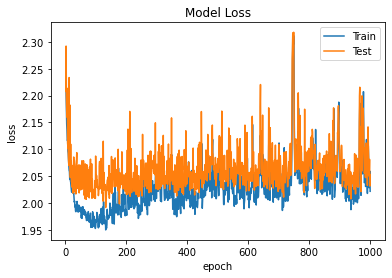

In [23]:
# Save the plot for losses
train_loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

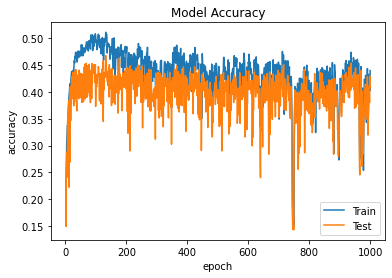

In [24]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()